<a href="https://colab.research.google.com/github/SARA3SAEED/ML-Mu/blob/main/s06b_supervised_regression_slr_mlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning | Regression (Linear Regression)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

## Simple Linear Regresssion | Intuition (Fuel Consumption)

Scikit-Learn Linear Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

OLS Demo: https://www.geogebra.org/m/h7zw5jCG

### Importing & Creating Dataset

In [5]:
fuel = pd.read_csv('/content/drive/MyDrive/ML-Mu/s06b-supervised-regression-slr-mlr/datasets/fuel.csv')
fuel

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [6]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
fuel.describe().round(2)

,Horse Power,Fuel Economy (MPG)
count,100.00,100.00
mean,213.68,23.18
std,62.06,4.70
min,50.00,10.00
25%,175.00,20.44
50%,218.93,23.14
75%,251.71,26.09
max,350.00,35.00


### Exploring Data

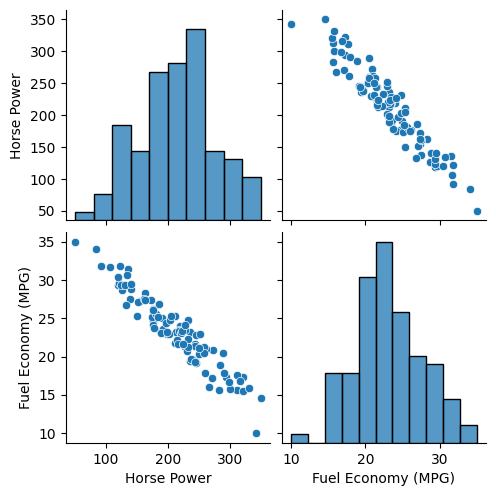

In [8]:
sns.pairplot(fuel)

<Axes: xlabel='Horse Power', ylabel='Fuel Economy (MPG)'>

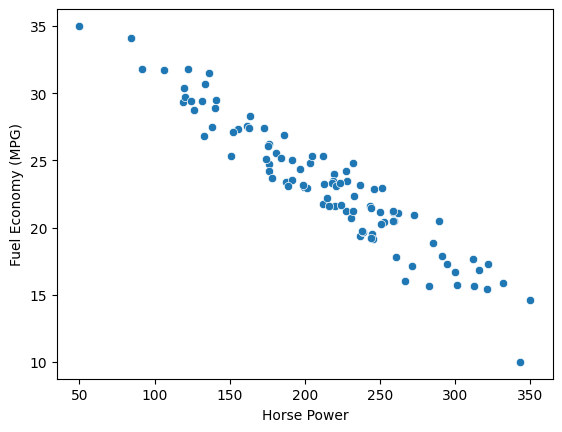

In [9]:
sns.scatterplot(data = fuel, x = 'Horse Power', y = 'Fuel Economy (MPG)')

<Axes: xlabel='Horse Power', ylabel='Fuel Economy (MPG)'>

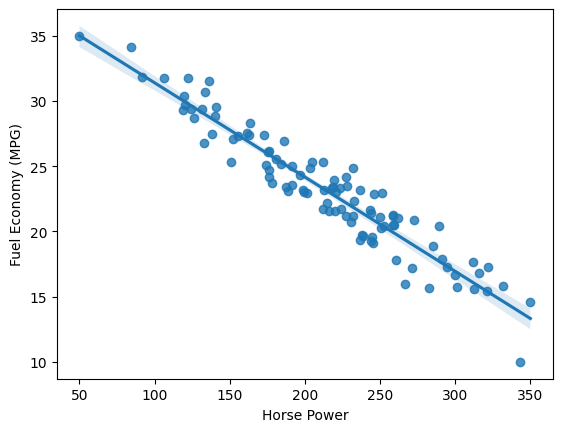

In [10]:
sns.regplot(x = 'Horse Power', y =  'Fuel Economy (MPG)', data = fuel)

### Splitting Data

In [11]:
X = fuel[['Horse Power']]
y = fuel['Fuel Economy (MPG)']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Model Training & Building

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
reg.coef_

array([-0.07302788])

In [17]:
reg.intercept_

38.65801516298453

### Model Evaluation & Prediction

In [18]:
reg.predict([[300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.74965171])

In [19]:
y_pred = reg.predict(X_test)
y_pred

array([21.2162931 , 24.70246337, 23.93366261, 23.17004084, 21.38951819,
       28.70384411, 14.43477061, 17.51717448, 29.44109304, 28.40254131,
       20.81304388, 25.07190545, 22.35967893, 28.96943801, 29.74568113,
       19.79430478, 18.02002669, 22.01689673, 22.05292715, 18.72828779,
       22.69453436, 24.28178056, 29.98443574, 22.73011783, 19.76863311,
       20.70627247, 21.82781484, 28.36401987, 15.59453338, 25.85265611])

In [20]:
y_test.values

array([19.67409397, 24.98962965, 22.93765296, 21.72625199, 19.36733689,
       31.49742937, 15.83796845, 20.45016379, 28.71821022, 28.88208128,
       19.53677007, 26.89706687, 23.3071922 , 26.77814827, 31.79661213,
       21.26177779, 15.67631564, 23.48881057, 24.18110919, 20.89807976,
       23.42673926, 24.35585092, 29.34419493, 23.29937173, 20.4706756 ,
       22.84971109, 20.71572205, 29.51559288, 16.8311881 , 26.05708471])

In [21]:
reg.score(X,y)

0.9087224052953036

In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8658367668146635


Text(0.5, 1.0, 'HP vs. MPG (Testing Set)')

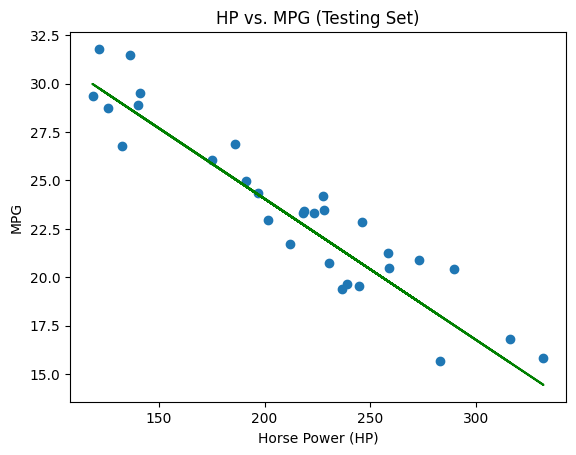

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'g')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Testing Set)')

==========

## Multiple Linear Regression (MLR) | Full Case-study (Start-Ups)

### Importing Dataset & Extracting Features

In [25]:
startups = pd.read_csv('/content/drive/MyDrive/ML-Mu/s06b-supervised-regression-slr-mlr/datasets/startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
startups.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


### Exploring Data

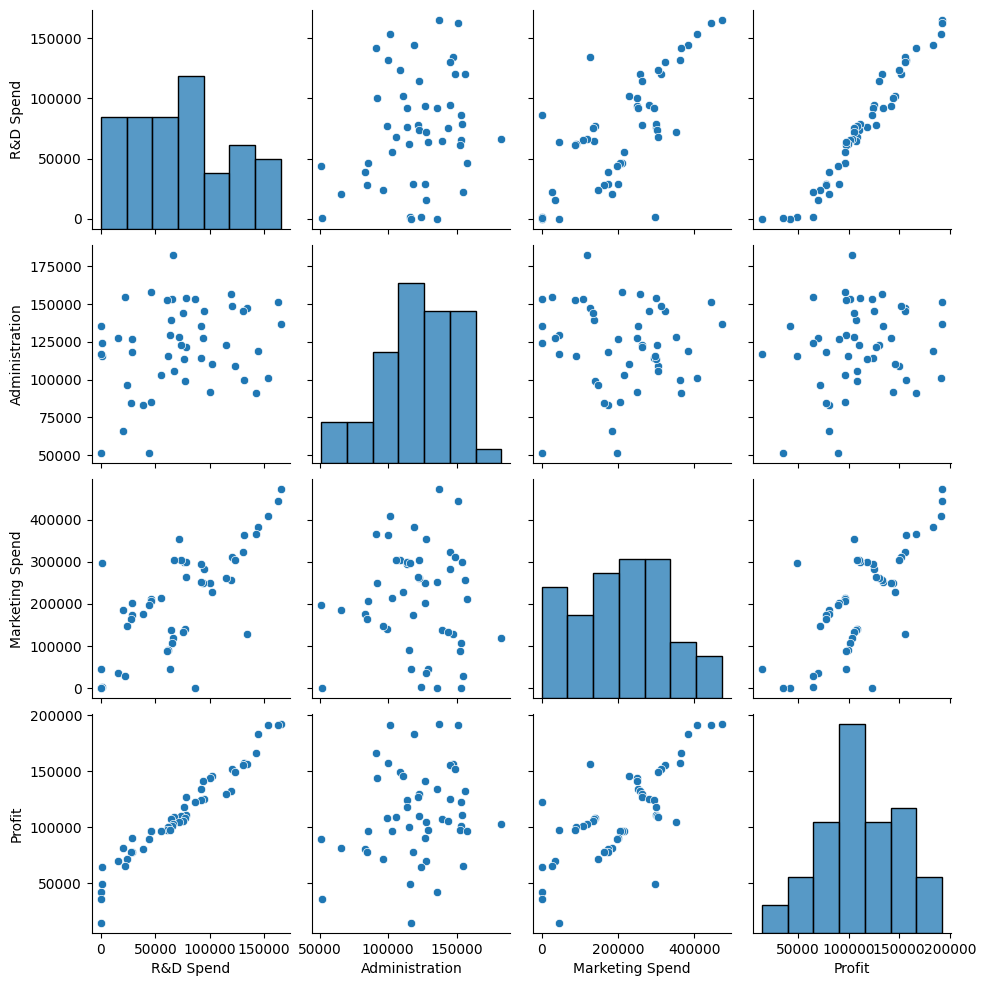

In [29]:
sns.pairplot(startups)

### Data Splitting & Preprocessing

In [30]:
X = startups.iloc[:, :-1].values
y = startups.iloc[:, -1].values

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model Training & Building

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
reg.coef_

array([ 8.66383692e+01, -8.72645791e+02,  7.86007422e+02,  7.73467193e-01,
        3.28845975e-02,  3.66100259e-02])

In [38]:
reg.intercept_

42467.52924853278

### Model Evaluation

In [39]:
reg.predict([[0.0, 0.0, 1.0, 150000, 130000, 450]])

array([163565.0877715])

In [40]:
y_pred = reg.predict(X_test)
y_pred

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

In [41]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test, y_pred)

0.9347068473282546

In [44]:
reg.score(X,y)

0.9485223547171578

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
print(mean_absolute_error(y_test, y_pred))

7514.29365964318


In [47]:
print(mean_squared_error(y_test, y_pred))

83502864.03256194


In [48]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

9137.9901527941


In [49]:
y.mean()

112012.63920000002

==========

# THANK YOU!